<a href="https://colab.research.google.com/github/strzelnat/machine_learning_basics/blob/main/basics/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.6.1'

In [2]:

data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [3]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


In [4]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [5]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [6]:
df.isnull().sum().sum()

np.int64(5)

In [7]:
df[['weight']]

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(df[['weight']])

imputer.statistics_

array([415.])

In [13]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [14]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value = 0.25)

imputer.fit(df[['weight']])

imputer.statistics_

array([0.25])

In [22]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imputer.fit(df[['size']])

imputer.statistics_

array(['M'], dtype=object)

In [25]:
df.fillna(value = 0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,0.0,no


In [26]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [27]:
df['size'].dropna()

,size
0,XL
1,L
2,M
4,M
5,M


In [37]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


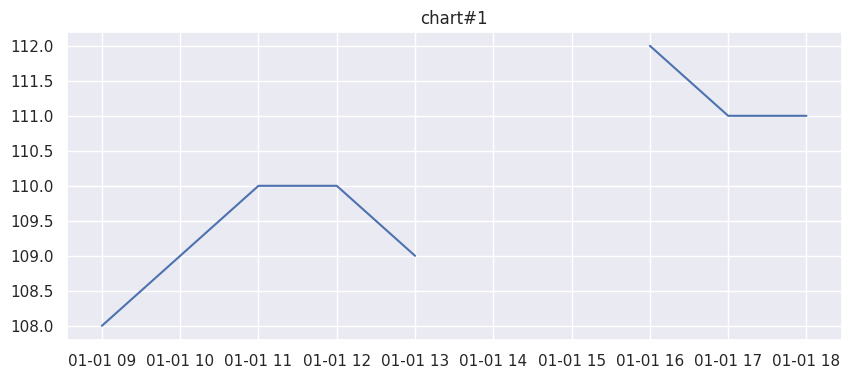

In [40]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10,4))
plt.title('chart#1')
_ = plt.plot(df)

In [41]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width = 600, height = 400, title = 'Missing data in the series')

In [50]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width = 600, height = 400, title = 'Missing data in the series - deleting mv')

In [45]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width = 600, height = 400, title = 'Missing data in the series - place 0')

In [58]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width = 600, height = 400, title = 'Missing data in the series - interpolate')

In [57]:
df_plotly = df.reset_index()
df_plotly['price_avg'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_avg', width = 600, height = 400, title = 'Missing data in the series - place mean')

In [54]:
df_plotly = df.reset_index()
df_plotly['price_ff'] = df_plotly['price'].ffill()
px.line(df_plotly, 'index', 'price_ff', width = 600, height = 400, title = 'Missing data in the series - forward_fill')

In [56]:
df_plotly = df.reset_index()
df_plotly['price_bf'] = df_plotly['price'].bfill()
px.line(df_plotly, 'index', 'price_bf', width = 600, height = 400, title = 'Missing data in the series - backward_fill')